In [320]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import plot_importance

In [321]:
# Churn Telecom dataset
df = pd.read_csv('churn-in-telecoms-dataset//bigml_59c28831336c6604c800002a.csv', sep = ',')

In [322]:
# Head
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [323]:
# Unbalanced data
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [324]:
# Transform categorical to numeric
df["international plan"] = df["international plan"].astype('category')
df["international plan"] = df["international plan"].cat.codes

In [325]:
# Transform categorical to numeric
df["voice mail plan"] = df["voice mail plan"].astype('category')
df["voice mail plan"] = df["voice mail plan"].cat.codes

In [326]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E921B72CF8>,
      dtype=object)

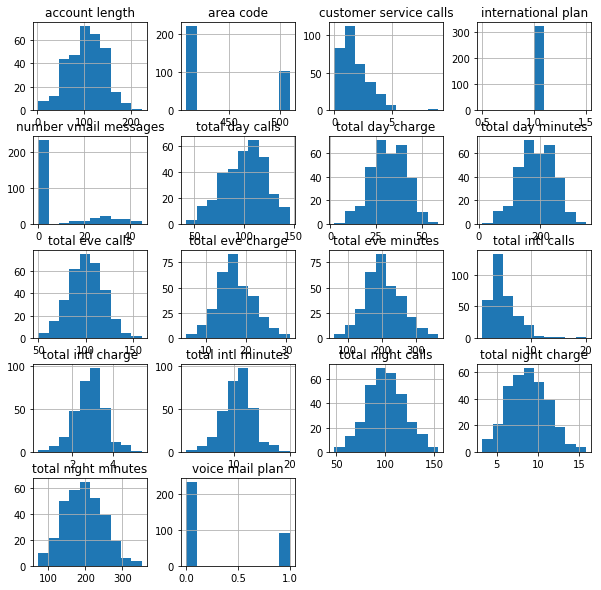

In [327]:
# Histogram
df2 = df.drop(['state', 'phone number', 'churn'], axis=1)
df2[df2['international plan'] == 1].hist(figsize = (10,10))

In [328]:
#Drop columns
df.drop(['state', 'phone number'], axis=1, inplace = True)

In [329]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [330]:
# Get dependent and independent variables
y = df['churn']
X = df.loc[:, df.columns != 'churn']

In [331]:
# Train and valid
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.3)

APPLYING DECISION TREE

In [332]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_treino, y_treino)
p_tree = clf.predict(X_valid)    
acc = np.mean(y_valid == p_tree)
print("Acc: ", acc)
print("AUC: ", roc_auc_score(y_valid, p_tree))
print("F1-Score: ", f1_score(y_valid, p_tree))

Acc:  0.917
AUC:  0.820089455652836
F1-Score:  0.7087719298245614


In [333]:
# Metrics to evaluate the model
print(classification_report(y_valid, p_tree))

              precision    recall  f1-score   support

       False       0.95      0.96      0.95       852
        True       0.74      0.68      0.71       148

    accuracy                           0.92      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.91      0.92      0.92      1000



In [334]:
# Use smote library for not balanced data
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_treino, y_treino.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (3996, 18)
After OverSampling, the shape of train_y: (3996,) 

After OverSampling, counts of label '1': 1998
After OverSampling, counts of label '0': 1998


In [335]:
# Running Decision Tree after smote

clf = tree.DecisionTreeClassifier()
clf.fit(X_train_res, y_train_res)
p_tree = clf.predict(X_valid)    
acc = np.mean(y_valid == p_tree)
print("Acc: ", acc)
print("AUC: ", roc_auc_score(y_valid, p_tree))
print("F1-Score: ", f1_score(y_valid, p_tree))

Acc:  0.828
AUC:  0.7929831239690396
F1-Score:  0.5612244897959183


In [336]:
# Other metrics to evaluate after smote
print(classification_report(y_valid, p_tree))

              precision    recall  f1-score   support

       False       0.95      0.84      0.89       852
        True       0.45      0.74      0.56       148

    accuracy                           0.83      1000
   macro avg       0.70      0.79      0.73      1000
weighted avg       0.88      0.83      0.84      1000



In [337]:
# Pandas confusion matrix

data = {'y_Actual':    y_valid,
        'y_Predicted': p_tree}

df_pred = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_pred['y_Actual'], df_pred['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
False,718,134
True,38,110


In [338]:
# Using repeat k fold for better splits
decision_tree = []
decision_tree_auc = []
decision_tree_f1 = []
kf = RepeatedKFold(n_splits=2, n_repeats=30, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train_res, y_train_res)
    p_tree = clf.predict(X_valid)
    acc = np.mean(y_valid == p_tree)
    decision_tree.append(acc)
    decision_tree_auc.append(roc_auc_score(y_valid, p_tree))
    decision_tree_f1.append(f1_score(y_valid, p_tree))

(array([ 1.,  6.,  3., 10., 11.,  7., 11.,  9.,  0.,  2.]),
 array([0.940012  , 0.94211158, 0.94421116, 0.94631074, 0.94841032,
        0.9505099 , 0.95260948, 0.95470906, 0.95680864, 0.95890822,
        0.9610078 ]),
 <a list of 10 Patch objects>)

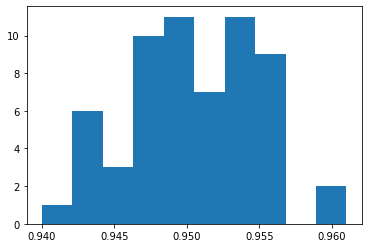

In [339]:
# Accuracy Decision Tree
plt.hist(decision_tree)

(array([ 2.,  2.,  8., 11.,  7.,  5.,  8.,  7.,  7.,  3.]),
 array([0.92302186, 0.92584252, 0.92866318, 0.93148385, 0.93430451,
        0.93712518, 0.93994584, 0.94276651, 0.94558717, 0.94840783,
        0.9512285 ]),
 <a list of 10 Patch objects>)

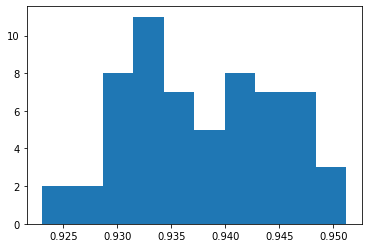

In [340]:
# Auc Decision Tree
plt.hist(decision_tree_auc)

(array([ 3.,  4.,  5., 12.,  8., 11.,  7.,  7.,  1.,  2.]),
 array([0.81684982, 0.82252116, 0.8281925 , 0.83386384, 0.83953518,
        0.84520652, 0.85087786, 0.8565492 , 0.86222054, 0.86789188,
        0.87356322]),
 <a list of 10 Patch objects>)

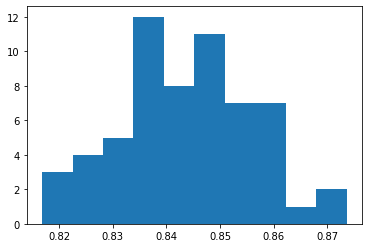

In [341]:
# F1 Score Decision
plt.hist(decision_tree_f1)

APPLYING XGBOOST FOR UNBALANCED DATA

In [362]:
model=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.15,max_depth = 5, alpha = 10, n_estimators = 200)
model.fit(X_treino, y_treino)
p_xg = model.predict(X_valid) 
print(classification_report(y_valid, p_xg))

              precision    recall  f1-score   support

       False       0.94      0.99      0.96      1437
        True       0.89      0.61      0.72       229

    accuracy                           0.94      1666
   macro avg       0.92      0.80      0.84      1666
weighted avg       0.93      0.94      0.93      1666



In [363]:
# Pandas confusion matrix

data = {'y_Actual':    y_valid,
        'y_Predicted': p_xg}

df_pred = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_pred['y_Actual'], df_pred['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
False,1420,17
True,90,139


In [349]:
# Using repeat k fold for better splits
xb_acc = []
xb_auc = []
xb_f1 = []
kf = RepeatedKFold(n_splits=2, n_repeats=30, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.15,max_depth = 5, alpha = 10, n_estimators = 200)
    model.fit(X_train_res, y_train_res)
    p_xg = model.predict(X_valid)
    acc = np.mean(y_valid == p_xg)
    xb_acc.append(acc)
    xb_auc.append(roc_auc_score(y_valid, p_xg))
    xb_f1.append(f1_score(y_valid, p_xg))

(array([3., 3., 8., 9., 7., 7., 9., 8., 3., 3.]),
 array([0.96638655, 0.96746836, 0.96855016, 0.96963196, 0.97071376,
        0.97179556, 0.97287736, 0.97395916, 0.97504096, 0.97612276,
        0.97720456]),
 <a list of 10 Patch objects>)

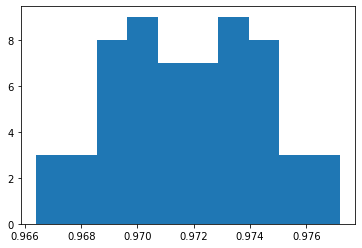

In [350]:
# Accuracy Xb
plt.hist(xb_acc)

(array([ 2.,  3.,  7., 10.,  8.,  7., 12.,  7.,  3.,  1.]),
 array([0.93054146, 0.93341627, 0.93629108, 0.9391659 , 0.94204071,
        0.94491553, 0.94779034, 0.95066515, 0.95353997, 0.95641478,
        0.95928959]),
 <a list of 10 Patch objects>)

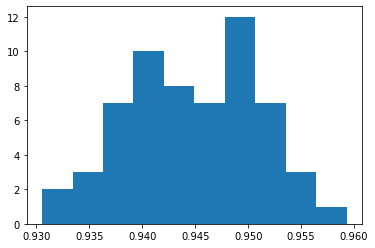

In [351]:
# Auc Xb
plt.hist(xb_auc)

(array([ 2.,  1.,  8.,  5., 10., 14.,  8.,  8.,  1.,  3.]),
 array([0.87982833, 0.88430581, 0.8887833 , 0.89326078, 0.89773827,
        0.90221575, 0.90669324, 0.91117072, 0.9156482 , 0.92012569,
        0.92460317]),
 <a list of 10 Patch objects>)

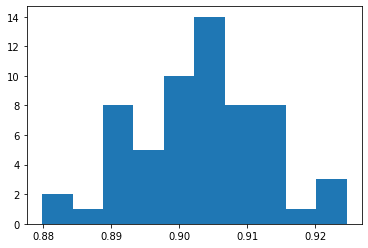

In [352]:
# F1 Score Xb
plt.hist(xb_f1)

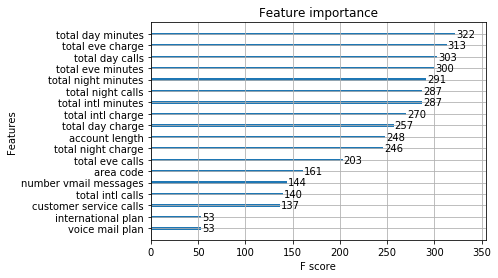

In [353]:
# Variables most important for the model
plot_importance(model)